<a href="https://colab.research.google.com/github/badrinarayanan02/DataAnalytics/blob/main/classifydocs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying the documents

In [ ]:
from sklearn.datasets import fetch_20newsgroups
import spacy
from string import punctuation
import re
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,silhouette_score


In [ ]:
train = fetch_20newsgroups(subset='train')
test = fetch_20newsgroups(subset='test')

In [ ]:
print(f"Categories: {train.target_names}")
print(f"Number of documents: {len(train.data)}")
print(f"Number of categories: {len(train.target_names)}")
print(f"Training Docs: {len(train.data)}")
print(f"Testing Docs: {len(test.data)}")

Categories: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
Number of documents: 11314
Number of categories: 20
Training Docs: 11314
Testing Docs: 7532


In [ ]:
pip install scikit-learn

In [ ]:
type(train)

sklearn.utils._bunch.Bunch

# Preprocessing

In [ ]:
def preprocess():
  # loading the spacy english model
  nlp = spacy.load("en_core_web_sm")

  for i in train.data:

    # processing the text with spaCy
    doc = nlp(i)
    # getting the unique tokens in the para
    unique_tokens = set(token.text for token in doc)
    num_unique_tokens = len(unique_tokens)
    print(f"Number of unique tokens : {num_unique_tokens}")

    # counting the punctuation characters
    num_punctuation = sum(1 for token in doc if token.text in punctuation)
    # paragraph without punctuation
    paraWithoutPunc = ''.join(token.text for token in doc if token.text not in punctuation)

    print(f"Number of punctuation characters : {num_punctuation}")
    print(f"Para without punc : {paraWithoutPunc}")

    # tokenization
    tokens = [token.text for token in doc]
    print(f"Tokens : {tokens}")

    # stemming
    stemmed_tokens = [token.lemma_ for token in doc]
    print(f"Stemmed Tokens : {stemmed_tokens}")

    # lemmatization
    lemmatized_tokens = [token.lemma_ for token in doc]
    print(f"Lemmatized Tokens : {lemmatized_tokens}")

    # part of speech tagging
    pos_tags = [(token.text, token.pos_) for token in doc]
    print(f"POS Tags : {pos_tags}")

    # named entity recognition
    named_entities = [(token.text, token.ent_type_) for token in doc]
    print(f"Named Entities : {named_entities}")

    # removing stop words
    stop_words = spacy.lang.en.stop_words.STOP_WORDS
    filtered_tokens = [token.text for token in doc if token.text not in stop_words]
    print(f"Filtered Tokens : {filtered_tokens}")

preprocess()

Streaming output truncated to the last 5000 lines.
TwooftheirrepsspokeaboutWayneLoandhisSKSassaultrifle
ThesecondoneHodgekissacosponsorhaddonehishomeworksowell
thathekeptconfusingMontanaWayneLo'shomestatewithMissouri
andbecamebelligerentwhenaboutfivegunownersinthegallery
correctedhimafterhissecondmuff CarrfromGloucesterclaimed
thatthenewbillwouldputthelawbackthewayitwasbuthewas
lyingthenewbillallowspurchasesbynonresidentsofadjoining
statesONLYiftheyhavelicensingintheirownstateasstrongas
thatinMassachusetts Sincenoneofthemdothat'sthat

Someofthethingsthesetwosaidwerereallyoffensive Insomeof
theseotherstatesanyonecanbuyagunaslongashe'sbreathing
Oooooo WehavesomeveryverygoodgunlawsinMassachusettsif
onlytheotherstateswouldadoptthesametypeoflawswewouldn't
behavingthissituation--buttheywon't Naughtynaughty

NextupwasBostoncitycouncilmanAlbertDapperO'Neill Hewas
theretotestifyprogunbutinsomewayshewasaliability He's
reasonablyelderlyandtendstowanderandrepeathimselfplushe's
almostacaricatureofa

KeyboardInterrupt: 

# Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(max_features=1000)
xtrain = vectorizer.fit_transform(train.data)
xtest = vectorizer.transform(test.data)

In [ ]:
ytrain = train.target
ytest = test.target

# Model Training

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

Multinomial Naive Bayes

In [ ]:
model = MultinomialNB()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.6565321295804567

Performing clustering

In [ ]:
kmeans = KMeans(n_clusters=20)
kmeans.fit(xtrain)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=20)

In [ ]:
silhouette_score(xtrain,kmeans.labels_)

-0.010359315496274436

In [ ]:
inertia = []
silhouette_scores = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k,random_state=42)
  kmeans.fit(xtrain)
  inertia.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(xtrain,kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

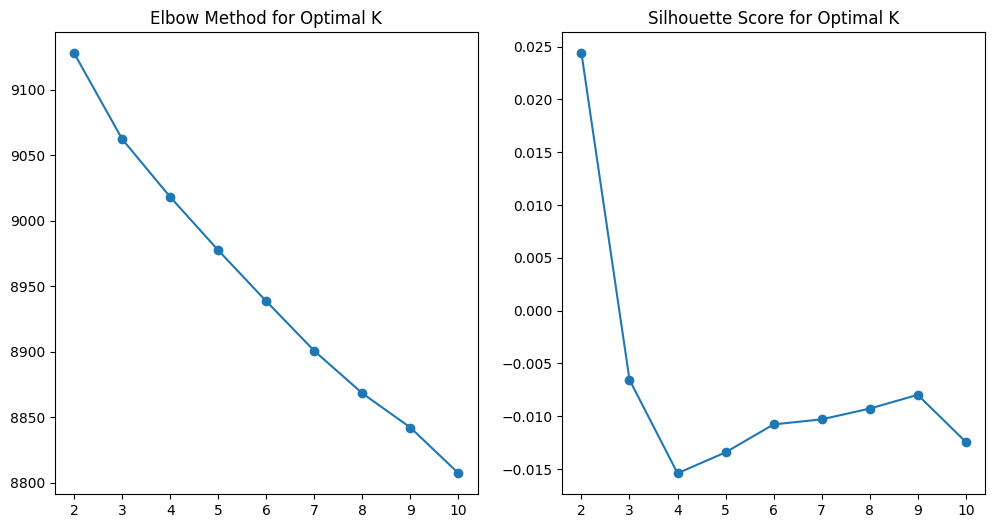

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(2,11),inertia,marker='o')
plt.title('Elbow Method for Optimal K')

plt.subplot(1,2,2)
plt.plot(range(2,11),silhouette_scores,marker='o')
plt.title('Silhouette Score for Optimal K')
plt.show()